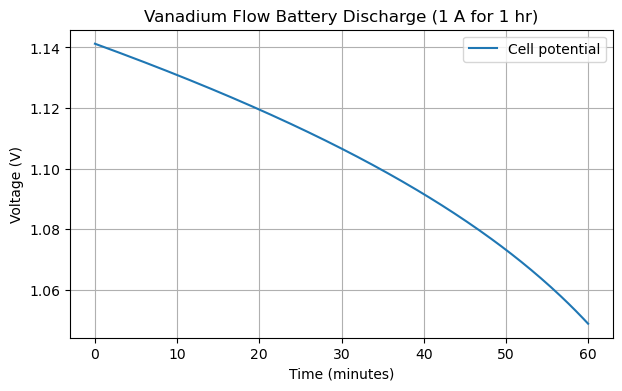

Power efficiency over the cycle: 0.8589377649352695


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, asinh

#3a
# Constants
F = 96485      # C/mol
R = 8.314      # J/(mol*K)
T = 298        # K
alpha = 0.5

# Given data
i0 = 0.5       # A/m^2 (exchange current density)
A = 1.0        # m^2 (electrode area)
I = 1.0        # A (total current)
V = 1.0        # L 
E_eq_0 = 1.35 # V this is the value computed in ps2a

# Initial concentrations (mol/L)
ci_v2 = 0.1
ci_v3 = 0.1
ci_vo2p = 1.0
ci_vo2pp = 1.0
pH = 1
cH = 10**(-pH)

time = np.linspace(0, 3600, 200)  # seconds
I_density = I / A                 # A/m^2

v_h = -2
v_vo2p = +1
v_vo2pp = -1
v_v3p = +1
v_v2p = -1

# Helper functions
def conc(ci, I, F, V, t, vi):
    return ci + (I * vi / (F * V)) * t

def E_eq(E_eq_0, c_vo2p, c_vo2pp, c_v3p, c_v2p, cH):
    return E_eq_0 - (R * T / F) * log((c_vo2p / (c_vo2pp * cH**2)) * (c_v3p / c_v2p))

def overpotential(i, i0, alpha):
    # We are able to use the sinh form since alpha = 0.5
    return (2 * R * T / F) * asinh(i / (2 * i0))

# Compute everything over time
Ecell_values = []

for t in time:
    # concentrations at time t
    c_v2_t = conc(ci_v2, I, F, V, t, v_v2p)
    c_v3_t = conc(ci_v3, I, F, V, t, v_v3p)
    c_vo2p_t = conc(ci_vo2p, I, F, V, t, v_vo2p)
    c_vo2pp_t = conc(ci_vo2pp, I, F, V, t, v_vo2pp)
    c_h_t = conc(cH, I, F, V, t, v_h)
    # print(c_h_t)

    Eeq_t = E_eq(E_eq_0, c_vo2p_t, c_vo2pp_t, c_v3_t, c_v2_t, c_h_t)
    eta_anode = overpotential(I_density, i0, alpha)
    eta_cathode = overpotential(I_density, i0, alpha)

    Ecell_t = Eeq_t - (eta_anode + eta_cathode)

    Ecell_values.append(Ecell_t)

# Plot
plt.figure(figsize=(7,4))
plt.plot(time[:len(Ecell_values)]/60, Ecell_values, label="Cell potential")
plt.xlabel("Time (minutes)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.title("Vanadium Flow Battery Discharge (1 A for 1 hr)")
plt.grid(True)
plt.show()

#3b

power_efficiency = 0
for t in time:
    # concentrations at time t
    c_v2_t = conc(ci_v2, I, F, V, t, v_v2p)
    c_v3_t = conc(ci_v3, I, F, V, t, v_v3p)
    c_vo2p_t = conc(ci_vo2p, I, F, V, t, v_vo2p)
    c_vo2pp_t = conc(ci_vo2pp, I, F, V, t, v_vo2pp)
    c_h_t = conc(cH, I, F, V, t, v_h)

    Eeq_t = E_eq(E_eq_0, c_vo2p_t, c_vo2pp_t, c_v3_t, c_v2_t, c_h_t)
    eta_anode = overpotential(I_density, i0, alpha)
    eta_cathode = overpotential(I_density, i0, alpha)

    V_discharge = Eeq_t - eta_cathode - eta_anode
    V_charge = Eeq_t + eta_cathode + eta_anode

    power_efficiency += V_discharge / V_charge
print("Power efficiency over the cycle:", power_efficiency / len(time))
